In [8]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters() 

import seaborn as sns 
sns.set_style('white')
%config InlineBackend.figure_format = 'svg'

%matplotlib inline

In [3]:
%autosave 60

Autosaving every 60 seconds


## Задание 1

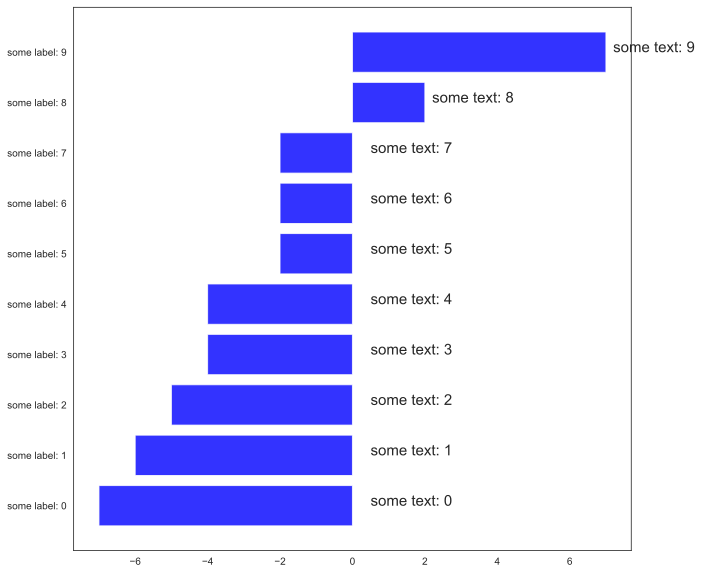

In [14]:
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (10, 10) #Пришлось изменить figsize, чтобы график помещался без полос прокрутки.

def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
    fig=plt.figure(figsize=(10, 10))
    ax = fig.gca()
    for i in range (10):
        ax.barh(i, bars_length[i], label=labels[i], color='blue', alpha=0.8)
        if bars_length[i]<0:
            ax.annotate(labels[i], xy=(0,i), xytext=(0.5,i), size=15)
        else:
            ax.annotate(labels[i], xy=(0,i), xytext=(bars_length[i]+0.2,i), size=15)
    ax.set_yticks(np.arange(0, 10))
    ax.set_yticklabels(yticks_labels, size=10)
    
plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)      

## Задание 2
* Выражение в строке, связанной с цветом, нужно, чтобы максимально четко реализовать плавный переход между красным и синим цветом (оно получено путем взятия определенных значений первого параметра в RGB и дальнейшей их аппроксимации).

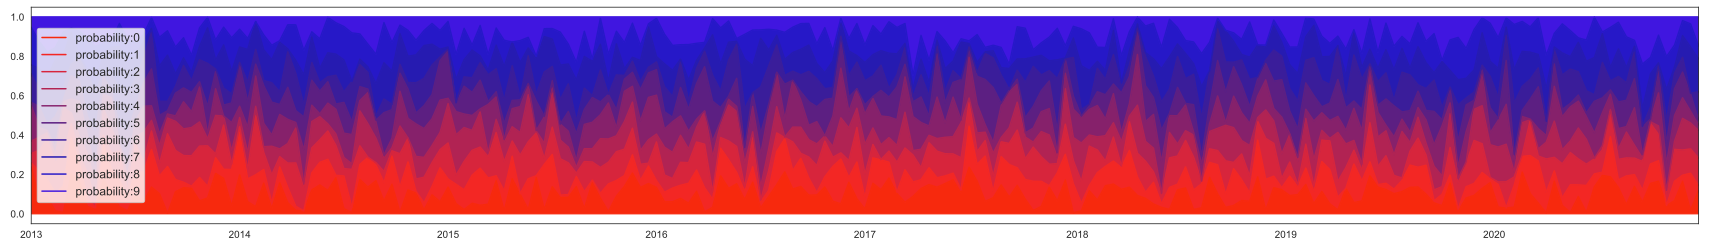

In [21]:
dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (30, 4)

def plot_time_probabilities(probabilities_in_time, figsize):
    fig=plt.figure(figsize=figsize)
    ax=plt.gca()
    
    for i in range (10):
        if i==0:
            probabilities_in_time[i].plot(color=(0.97,0.16,0.05), label='probability:0')
            ax.fill_between(probabilities_in_time.index, 0, probabilities_in_time[i].values, color=(0.97,0.16,0.05))
        else:
            probabilities_in_time[i]+=probabilities_in_time[i-1]
            
            probabilities_in_time[i].plot(color=(0.0040*i**3 - 0.0449*i**2 - 0.0031*i+0.9984, 
                                                 0.16-0.008*i,
                                                 0.05+0.092*i),                                       
                                                 label='probability:{}'. format(i))
            ax.fill_between(probabilities_in_time.index, probabilities_in_time[i].values, probabilities_in_time[i-1].values, color=(0.0040*i**3 - 0.0449*i**2 - 0.0031*i+0.9984,
                                                                                                                                    0.16-0.008*i,
                                                                                                                                    0.05+0.092*i))
    ax.legend(prop={'size': 12}, loc='center left')                                                                
        
plot_time_probabilities(probabilities_in_time, figsize)

## Задание 3

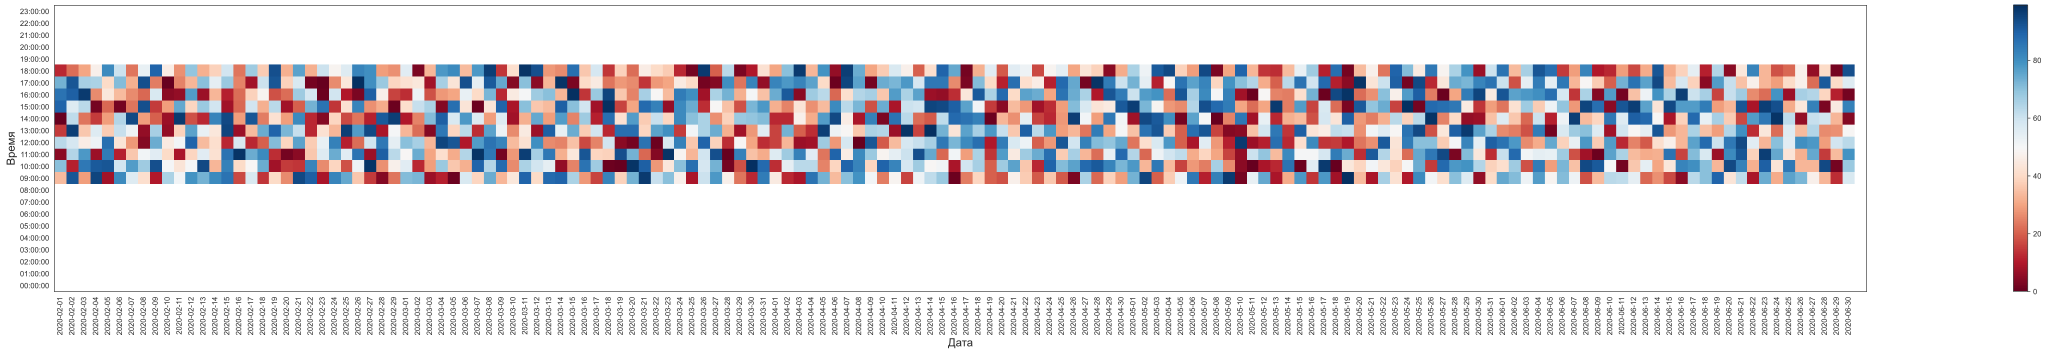

In [9]:
intraday = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday.loc[(intraday.index.hour < 9) | (intraday.index.hour > 18)] = np.nan


def plot_intraday(intraday):
    fig=plt.figure(figsize=(70,7)) #Меняю размер, чтобы данные были отражены более четко.
    
    fig.patch.set_facecolor('white')
    df_1=intraday.to_frame()
    df_1=pd.DataFrame({'Data':intraday.index.time,
                      'Time':intraday.index.date,
                      'Temperature': df_1[0]})
    df_2=df_1.pivot(index='Data',columns='Time', values='Temperature')
    plt.imshow(df_2, cmap="RdBu") 
    plt.colorbar()
    ax=plt.gca()
              
    ax.set_xlabel('Дата', fontsize=15)
    ax.set_xticks(np.arange(len(df_2.columns)-1))
    ax.set_xticks((np.arange(-0.5, len(df_2.columns)-1)),minor=True)
    ax.set_xticklabels(df_2.columns, rotation=90)
    ax.invert_yaxis()
    
    ax.set_ylabel('Время', fontsize=15)
    ax.set_yticks(np.arange(len(df_2.index)))
    ax.set_yticks((np.arange(-0.5, len(df_2.index))), minor=True)
    ax.set_yticklabels(df_2.index,fontsize=10)
    plt.show()
    
plot_intraday(intraday) 